In [1]:
#Import library yang dibutuhkan
import json
import numpy as np
import pandas as pd
import requests

**Membuat fungsi untuk input url**

In [2]:
#Membuat fungsi untuk input url
def get_json(api_url):
  response = requests.get(api_url)
  if response.status_code == 200:
    return json.loads(response.content.decode('utf-8'))
  else :
    return None

#memanggil API Covid-19
record_date = '2020-08-17'
covid_url = 'https://covid19-api.org/api/status?date='+record_date
df_covid_worldwide = pd.io.json.json_normalize(get_json(covid_url))
print(df_covid_worldwide.head())

  country          last_update    cases  deaths  recovered
0      US  2020-08-16T23:27:50  5401167  170019    1833067
1      BR  2020-08-16T23:27:50  3340197  107852    2655017
2      IN  2020-08-16T23:27:50  2589682   49980    1862258
3      RU  2020-08-16T23:27:50   920719   15653     731444
4      ZA  2020-08-16T23:27:50   587345   11839     472377


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


**Mengubah Format Date**

In [3]:
#Merubah Format date
df_covid_worldwide['last_update'] = pd.to_datetime(df_covid_worldwide['last_update'], format= '%Y-%m-%d %H:%M:%S')
df_covid_worldwide['last_update'] = df_covid_worldwide['last_update'].apply(lambda x : x.date())
print(df_covid_worldwide.head())

  country last_update    cases  deaths  recovered
0      US  2020-08-16  5401167  170019    1833067
1      BR  2020-08-16  3340197  107852    2655017
2      IN  2020-08-16  2589682   49980    1862258
3      RU  2020-08-16   920719   15653     731444
4      ZA  2020-08-16   587345   11839     472377


** Mengambil Data Countries**

In [4]:
#Mengambil Data Countries
countries_url = 'https://covid19-api.org/api/countries'
df_countries = pd.io.json.json_normalize(get_json(countries_url))
df_countries = df_countries.rename(columns={'alpha2':'country'})[['name', 'country']]
print(df_countries.head())

          name country
0  Afghanistan      AF
1      Albania      AL
2      Algeria      DZ
3      Andorra      AD
4       Angola      AO


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


**Merge Data Covid-19 dan Countries**

In [5]:
#Merge Covid19 Data dan Countries
df_covid_denormalized = pd.merge(df_covid_worldwide, df_countries, on='country')
print(df_covid_denormalized)

    country last_update    cases  deaths  recovered                      name
0        US  2020-08-16  5401167  170019    1833067  United States of America
1        BR  2020-08-16  3340197  107852    2655017                    Brazil
2        IN  2020-08-16  2589682   49980    1862258                     India
3        RU  2020-08-16   920719   15653     731444        Russian Federation
4        ZA  2020-08-16   587345   11839     472377              South Africa
..      ...         ...      ...     ...        ...                       ...
201      GG  2020-03-17        0       0          0                  Guernsey
202      GL  2020-03-19        0       0          0                 Greenland
203      GU  2020-03-18        0       0          0                      Guam
204      JE  2020-03-17        0       0          0                    Jersey
205      PR  2020-03-17        0       0          0               Puerto Rico

[206 rows x 6 columns]


**Menghitung Fatality Ratio**

In [6]:
#Menghitung Fatality Ratio
#membuat kolom tambahan berupa fatality ratio
df_covid_denormalized['fatality_ratio'] = df_covid_denormalized['deaths']/df_covid_denormalized['cases']
df_covid_denormalized

,country,last_update,cases,deaths,recovered,name,fatality_ratio
0,US,2020-08-16,5401167,170019,1833067,United States of America,0.031478
1,BR,2020-08-16,3340197,107852,2655017,Brazil,0.032289
2,IN,2020-08-16,2589682,49980,1862258,India,0.019300
3,RU,2020-08-16,920719,15653,731444,Russian Federation,0.017001
4,ZA,2020-08-16,587345,11839,472377,South Africa,0.020157
...,...,...,...,...,...,...,...
201,GG,2020-03-17,0,0,0,Guernsey,NaN
202,GL,2020-03-19,0,0,0,Greenland,NaN
203,GU,2020-03-18,0,0,0,Guam,NaN
204,JE,2020-03-17,0,0,0,Jersey,NaN


In [7]:
#Negara-negara dengan Fatality Ratio Tertinggi
df_top_20_fatality_rate = df_covid_denormalized.sort_values(by='fatality_ratio', ascending=False).head(20)
df_top_20_fatality_rate

,country,last_update,cases,deaths,recovered,name,fatality_ratio
134,YE,2020-08-16,1869,530,1013,Yemen,0.283574
11,GB,2020-08-16,320343,46791,1486,United Kingdom of Great Britain and Northern I...,0.146065
16,IT,2020-08-16,253915,35396,203786,Italy,0.139401
36,BE,2020-08-16,77869,9935,17981,Belgium,0.127586
105,HU,2020-08-16,4916,608,3623,Hungary,0.123678
17,FR,2020-08-16,252965,30410,83993,France,0.120214
6,MX,2020-08-16,517714,56543,418164,Mexico,0.109217
191,EH,2020-08-16,10,1,8,Western Sahara,0.100000
40,NL,2020-08-16,64451,6194,345,Netherlands,0.096104
10,ES,2020-08-16,342813,28617,150376,Spain,0.083477


**Membuat Visualisasi Data**

In [8]:
#Import Library Visualisasi
import matplotlib.pyplot as plt


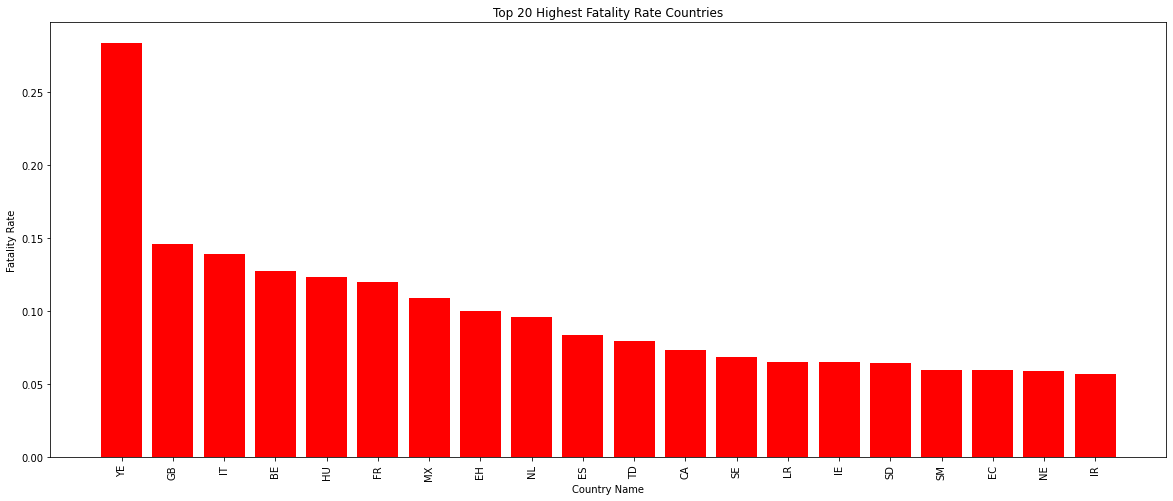

In [9]:
#Visualisasi Negara dengan Fatality Ratio Tertingi
plt.figure(figsize=(20,8))
x = df_top_20_fatality_rate['country']
y = df_top_20_fatality_rate['fatality_ratio']
plt.bar(x,y, color='red')
plt.xlabel('Country Name')
plt.ylabel('Fatality Rate')
plt.title('Top 20 Highest Fatality Rate Countries')
plt.xticks(rotation=90)
plt.show()

In [15]:
#Menggabungkan Data Frame
#Membandingkan kasus indonesia dan negara tetangga
countries = ['ID', 'MY', 'SG', 'TH', 'VN']
i = 0
for country in countries:
  covid_timeline_url = 'https://covid19-api.org/api/timeline/'+country
  df_covid_timeline = pd.io.json.json_normalize(get_json(covid_timeline_url))
  df_covid_timeline['last_update'] = pd.to_datetime(df_covid_timeline['last_update'], format='%Y-%m-%d %H:%M:%S')
  df_covid_timeline['last_update'].apply(lambda x : x.date())
  if i == 0:
      df_covid_timeline_merged = df_covid_timeline
  else :
      df_covid_timeline_merged = df_covid_timeline.append(df_covid_timeline_merged, ignore_index=True)
  i = i+1

print(df_covid_timeline_merged.head())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


  country         last_update  cases  deaths  recovered
0      VN 2020-11-11 12:25:37   1226      35       1087
1      VN 2020-11-10 23:25:15   1226      35       1087
2      VN 2020-11-09 23:25:07   1215      35       1087
3      VN 2020-11-08 23:24:56   1213      35       1070
4      VN 2020-11-07 23:24:59   1213      35       1070


In [11]:
#Merge Data Covid dengan Data Country
df_covid_timeline_denormalized = pd.merge(df_covid_timeline_merged, df_countries, on ='country')
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-11 12:25:37,1226,35,1087,Viet Nam
1,VN,2020-11-10 23:25:15,1226,35,1087,Viet Nam
2,VN,2020-11-09 23:25:07,1215,35,1087,Viet Nam
3,VN,2020-11-08 23:24:56,1213,35,1070,Viet Nam
4,VN,2020-11-07 23:24:59,1213,35,1070,Viet Nam
...,...,...,...,...,...,...
1348,ID,2020-03-10 12:53:02,27,0,2,Indonesia
1349,ID,2020-03-09 11:33:10,19,0,0,Indonesia
1350,ID,2020-03-08 10:03:13,6,0,0,Indonesia
1351,ID,2020-03-06 12:33:03,4,0,0,Indonesia


In [17]:
#Kasus Covid-19 di ASEAN pada bulan Oktober 2020
import datetime
df_covid_timeline_denormalized = df_covid_timeline_denormalized[(df_covid_timeline_denormalized['last_update'] >= datetime.datetime(2020, 10, 1))]
df_covid_timeline_denormalized

,country,last_update,cases,deaths,recovered,name
0,VN,2020-11-11 12:25:37,1226,35,1087,Viet Nam
1,VN,2020-11-10 23:25:15,1226,35,1087,Viet Nam
2,VN,2020-11-09 23:25:07,1215,35,1087,Viet Nam
3,VN,2020-11-08 23:24:56,1213,35,1070,Viet Nam
4,VN,2020-11-07 23:24:59,1213,35,1070,Viet Nam
...,...,...,...,...,...,...
1140,ID,2020-10-05 23:23:35,307120,11253,232593,Indonesia
1141,ID,2020-10-04 23:23:37,303498,11151,228453,Indonesia
1142,ID,2020-10-03 23:23:35,299506,11055,225052,Indonesia
1143,ID,2020-10-02 23:23:30,295499,10972,221340,Indonesia


**Visualisasi perbandingan kasus covid-19 antara Indonesia dan Negara Asia lainnya**

<Figure size 432x288 with 0 Axes>

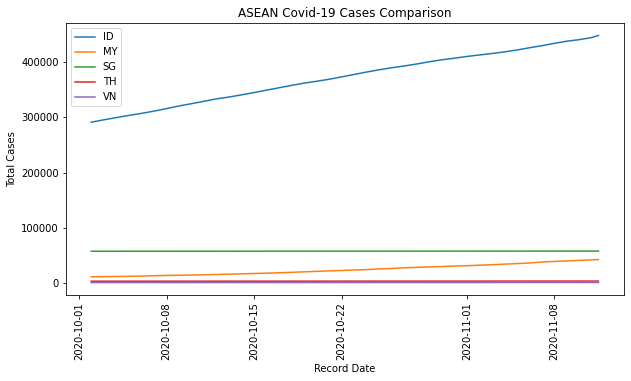

In [23]:
import matplotlib.pyplot as plt
plt.clf()
plt.figure(figsize=(10,5))
countries = ['ID', 'MY', 'SG', 'TH', 'VN']
for country in countries :
  country_data = df_covid_timeline_denormalized['country']== country
  x = df_covid_timeline_denormalized[country_data]['last_update']
  y = df_covid_timeline_denormalized[country_data]['cases']
  plt.plot(x, y, label = country)

plt.legend()
plt.xlabel('Record Date')
plt.ylabel('Total Cases')
plt.title('ASEAN Covid-19 Cases Comparison')
plt.xticks(rotation=90)
plt.show()